# Extraction of statistics from timeserie

This script allows to extract statistics (mean, maximum, minimum) from a timeserie.

In [63]:
import glob, os
import numpy as np
import pandas as pd
import rasterio
from rasterio import plot
from rasterio.plot import show
from pathlib import Path

Numpy : 1.19.2


## Set paths for input and output directories

In [111]:

grp_letter = 'A'
#work_path = f'X:/GROUP_{grp_letter}/TP/llesne/DATA/'
#work_path = f'/Volumes/nbdid-sst-lbrat2104/GROUP_{grp_letter}/TP/llesne/DATA/'
work_path = '/Users/Nicolas/Documents/LBRAT2104/WORK/'

# Directory where the images of the timeserie are stored
im_path = f'{work_path}NDVI/'

# Directory to store the statistics
stat_path = f'{work_path}NDVI_stat/'

Path(stat_path).mkdir(parents=True, exist_ok=True)


print(f'Input directory  : {im_path}')
print(f'Output directory : {stat_path}')

Input directory  : /Users/Nicolas/Documents/LBRAT2104/WORK/NDVI/
Output directory : /Users/Nicolas/Documents/LBRAT2104/WORK/NDVI_stat/


## Stack all raster into a single 3-D array

In [60]:

im_list = glob.glob(f'{im_path}*.tif')

list_array = []

for im_file in im_list:
    print(im_file)

    src = rasterio.open(im_file, "r")

    profile = src.profile

    im = src.read(1)

    list_array.append(im)


ts_array = np.stack(list_array, axis=0)

print(ts_array)
print(ts_array.shape)



/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_1.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_10.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_11.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_12.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_2.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_3.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_4.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_5.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_6.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_7.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_8.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_9.tif
/Volumes/nbdid-sst-lbrat2104/GROUP_A/TP/llesne/DATA/NDVI/NDVI_septembre.tif
[[[  0   0   0 ... 652 705 729]
  [  0   0   0 ... 661 699 690]
  [  0   0   0 ... 586 620 666]
  ...
  [

## Compute statistics on 3-D array

In [106]:
result_arr = np.zeros((ts_array.shape[1], ts_array.shape[2])) * np.nan

max_val = 1000
min_val = -1000

ts_array = ts_array/1.
ts_array[(ts_array >= max_val) | (ts_array <= min_val)] = np.nan


for line in range(0,ts_array.shape[1]):
    for col in range(0,ts_array.shape[2]):

        sorted_vec = np.sort(ts_array[:, line, col])
        sorted_vec = sorted_vec[~np.isnan(sorted_vec)]

        #sorted_vec = sorted_vec[np.nonzero(sorted_vec!=0)]

        # MAXIMUM

        #result_arr[line, col] = sorted_vec[-3:].mean()

        # MINIMUM
        
        result_arr[line, col] = sorted_vec[:3].mean()
        




/Users/Nicolas/miniconda3/envs/python_3_6/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice.
/Users/Nicolas/miniconda3/envs/python_3_6/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [107]:
print(ts_array.max())
print(result_arr.max())

nan
nan


(484, 802)
nan


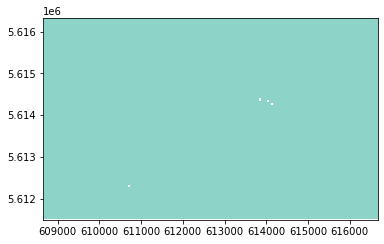

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 802, 'height': 484, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 608650.0,
       0.0, -10.0, 5616330.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [108]:
print(result_arr.shape)
print(result_arr[np.nonzero(result_arr!=0)].min())
import matplotlib.pyplot as plt
show(result_arr, transform=src.transform ,cmap='Set3', vmin=500, vmax=result_arr.max())
#SCL = SCL.astype(float)

print(profile)




In [105]:

print(result_arr)

print(profile.dtype)
profile['dtype'] = 'float64'

print(profile)

dst = rasterio.open(f'{stat_path}test_min.tif', "w", **profile)
dst.write(result_arr, 1)

dst.close()



[[  0.           0.           0.         ... 366.         262.66666667
  226.33333333]
 [  0.           0.           0.         ... 413.         345.
  240.66666667]
 [  0.           0.           0.         ... 372.33333333 406.33333333
  278.66666667]
 ...
 [  0.         307.66666667   0.         ... 389.33333333 351.33333333
    0.        ]
 [  0.         151.66666667 135.         ... 222.         188.66666667
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
float64
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 802, 'height': 484, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 608650.0,
       0.0, -10.0, 5616330.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
